In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
def formating(x, text_val):
    print('{0}: {1:.6f} ± {2:.6f}'.format(text_val, x[0],x[1]))        
    
def func_volume(Area, Area_unc, height, height_unc):
    volume = Area*height
    volume_unc_pct = np.sqrt((Area_unc/Area)**2+(height_unc/height)**2)
    volume_unc = volume * volume_unc_pct
    return volume, volume_unc   

def formating_unc(value, unc, title):
    structure = '{0:.7f} ± {1:.7f}'
    print(title)
    for i,j in zip(value,unc):
        print(structure.format(i,j))

### Given values

In [81]:
Diameter = [0.0159, .0001]   # Format [Value, Uncertainty]
def diameter_to_radius(Diameter):
    radius = Diameter[0]/2
    rad_unc = radius * (Diameter[1] / Diameter[0])
    return [radius, rad_unc]
Radius = diameter_to_radius(Diameter)
formating(Radius, 'Radius(m)')

Radius(m): 0.007950 ± 0.000050


In [82]:
def area_radius(Radius):
    rad_unc = Radius[1] / Radius[0]
    area = np.pi * Radius[0]**2
    area_unc = area*np.sqrt(rad_unc**2+rad_unc**2)
    return [area, area_unc]
Area = area_radius(Radius)
formating(Area, 'Area(m^2)')

Area(m): 0.000199 ± 0.000002


### Part 1

In [83]:
height = np.array([0.100,0.095,0.090,0.087,0.085,
                   0.082,0.080,0.075,0.070,0.067])
height_unc = np.empty(10); height_unc.fill(0.0001)

In [84]:
volume, volume_unc = func_volume(Area[0], Area[1], height, height_unc)
formating_unc(volume,volume_unc,'Volume(m^3)')

Volume(m^3)
0.0000199 ± 0.0000002
0.0000189 ± 0.0000002
0.0000179 ± 0.0000002
0.0000173 ± 0.0000002
0.0000169 ± 0.0000002
0.0000163 ± 0.0000001
0.0000159 ± 0.0000001
0.0000149 ± 0.0000001
0.0000139 ± 0.0000001
0.0000133 ± 0.0000001


### Part 2

In [87]:
Temp = np.array([359, 352, 347, 338, 337,
                 330, 328, 324, 321, 315.5])   # T in Kelvin
df=pd.DataFrame(data={'Temp (K)': Temp,
                      'Height (m)': height,
                      'Volume (m^3)': volume,
                      'Volume_unc': volume_unc})
df

,Temp (K),Height (m),Volume (m^3),Volume_unc
0,359.0,0.100,0.000020,1.777173e-07
1,352.0,0.095,0.000019,1.689452e-07
2,347.0,0.090,0.000018,1.601795e-07
3,338.0,0.087,0.000017,1.549237e-07
4,337.0,0.085,0.000017,1.514214e-07
5,330.0,0.082,0.000016,1.461706e-07
6,328.0,0.080,0.000016,1.426721e-07
7,324.0,0.075,0.000015,1.339334e-07
8,321.0,0.070,0.000014,1.252076e-07
9,315.5,0.067,0.000013,1.199795e-07


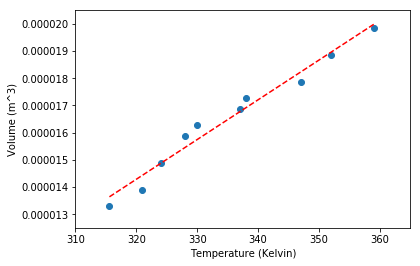

In [104]:
# Ploting T vs V
plt.scatter(Temp, volume)
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Volume (m^3)')
z = np.polyfit(Temp, volume, 1)
p = np.poly1d(z)
plt.plot(Temp, p(Temp), "r--")
plt.axis([310,365,0.0000125,0.0000205])
plt.show()